In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

salary_data = pd.read_csv("Salary_Data.csv")

salary_data[salary_data.isnull().any(axis=1)]
salary_data.dropna(inplace=True)
salary_data.info()

salary_data['Education Level'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education Level, dtype: int64

In [12]:
def UnifyEducationLevel(s):
    for e in ['Bachelor', 'Master', 'PhD']:
        if e.lower() in s.lower(): return e
    return s

salary_data['Education Level'] = salary_data['Education Level'].apply(UnifyEducationLevel)
salary_data['Education Level'].value_counts()

Bachelor       3021
Master         1860
PhD            1369
High School     448
Name: Education Level, dtype: int64

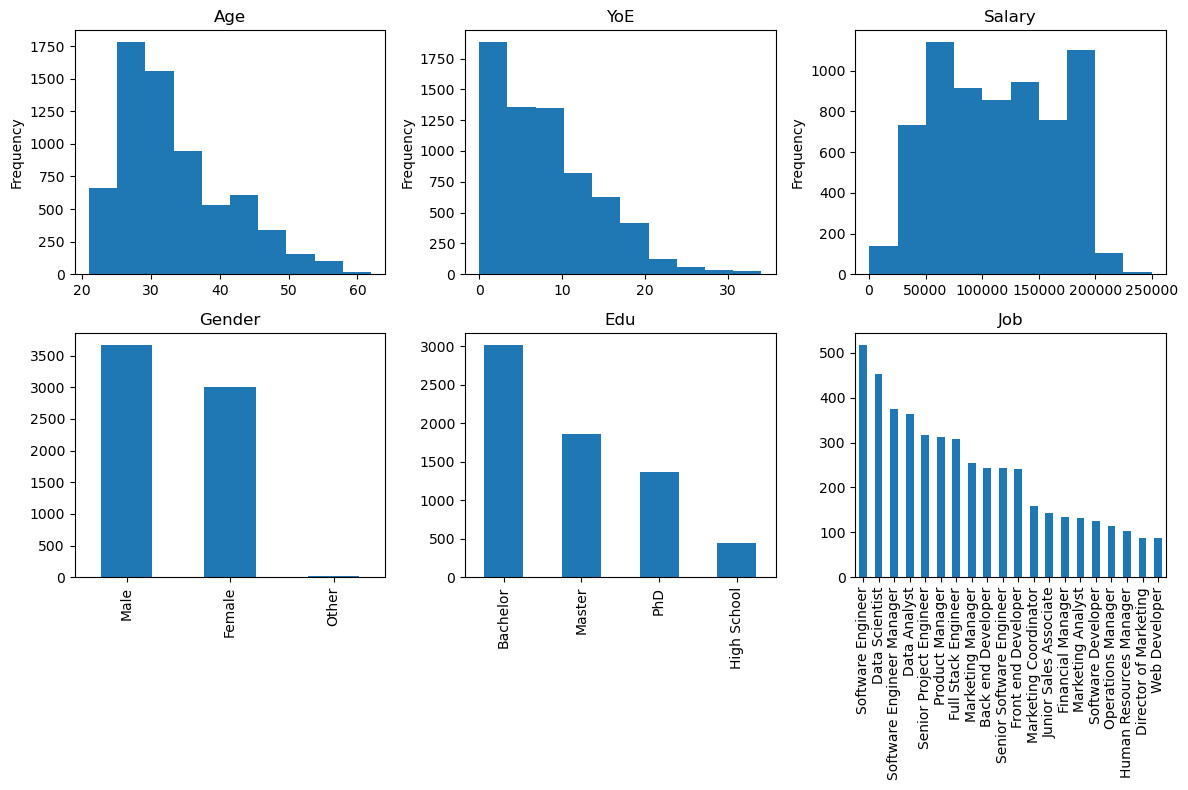

In [15]:
salary_data['Age'] = salary_data['Age'].astype('int')
salary_data['Years of Experience'] = salary_data['Years of Experience'].astype('int')
salary_data['Salary'] = salary_data['Salary'].astype('int')

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 8))

salary_data['Age'].plot(kind = 'hist', ax = axes[0, 0], title = 'Age')
salary_data['Years of Experience'].plot(kind = 'hist', ax = axes[0, 1], title = 'YoE')
salary_data['Salary'].plot(kind = 'hist', ax = axes[0, 2], title = 'Salary')
salary_data['Gender'].value_counts().plot(kind = 'bar', ax = axes[1, 0], title = 'Gender')
salary_data['Education Level'].value_counts().plot(kind = 'bar', ax = axes[1, 1], title = 'Edu')
salary_data['Job Title'].value_counts()[:20].plot(kind = 'bar', ax = axes[1, 2], title = 'Job')
plt.tight_layout()

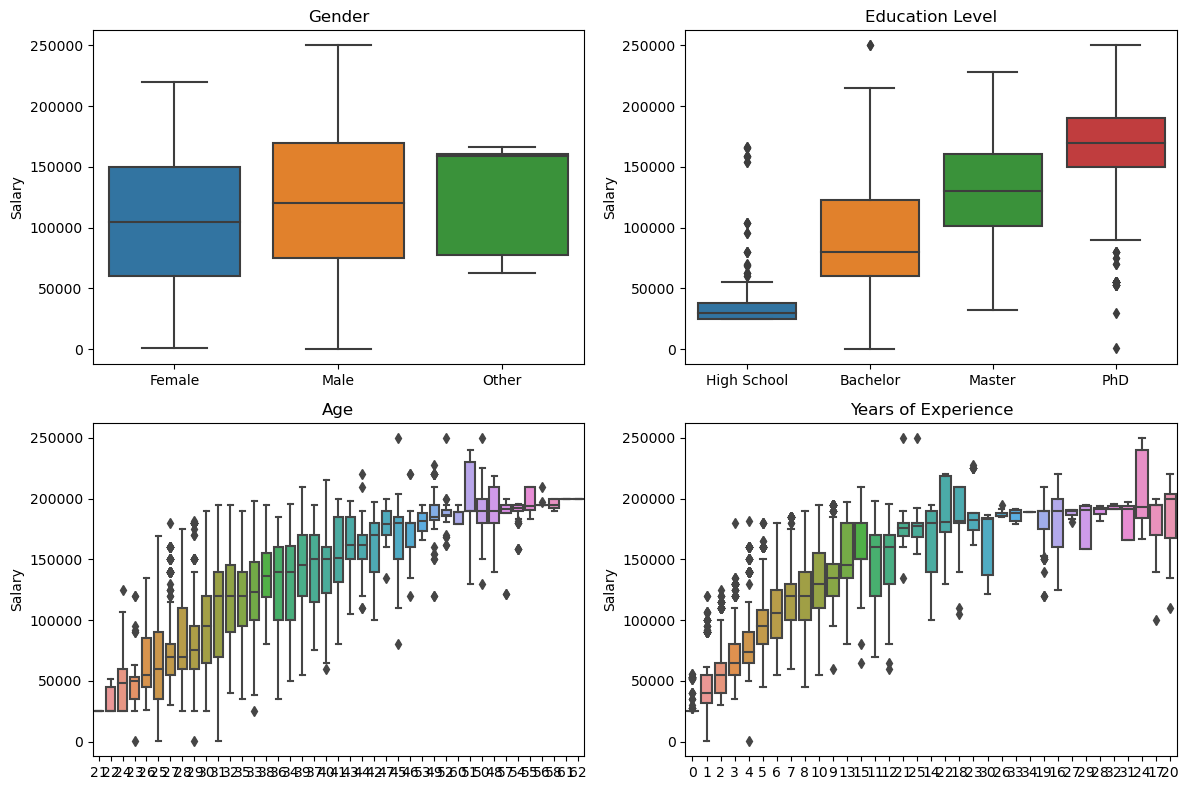

In [16]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8))

xfactor = "Gender"
g = sns.boxplot(x=xfactor, y = "Salary", data = salary_data, ax=axes[0,0], order = salary_data.groupby(xfactor)['Salary'].median().sort_values().index)
g.set(title="Gender", xlabel = None)

xfactor = "Education Level"
g = sns.boxplot(x=xfactor, y = "Salary", data = salary_data, ax=axes[0,1], order = salary_data.groupby(xfactor)['Salary'].median().sort_values().index)
g.set(title = "Education Level", xlabel = None)

xfactor = "Age"
g = sns.boxplot(x=xfactor, y = "Salary", data = salary_data, ax=axes[1,0], order = salary_data.groupby(xfactor)['Salary'].median().sort_values().index)
g.set(title="Age", xlabel = None)

xfactor = "Years of Experience"
g = sns.boxplot(x=xfactor, y = "Salary", data = salary_data, ax=axes[1,1], order = salary_data.groupby(xfactor)['Salary'].median().sort_values().index)
g.set(title = xfactor, xlabel = None)

plt.tight_layout()

<AxesSubplot:xlabel='Salary', ylabel='Job Title'>

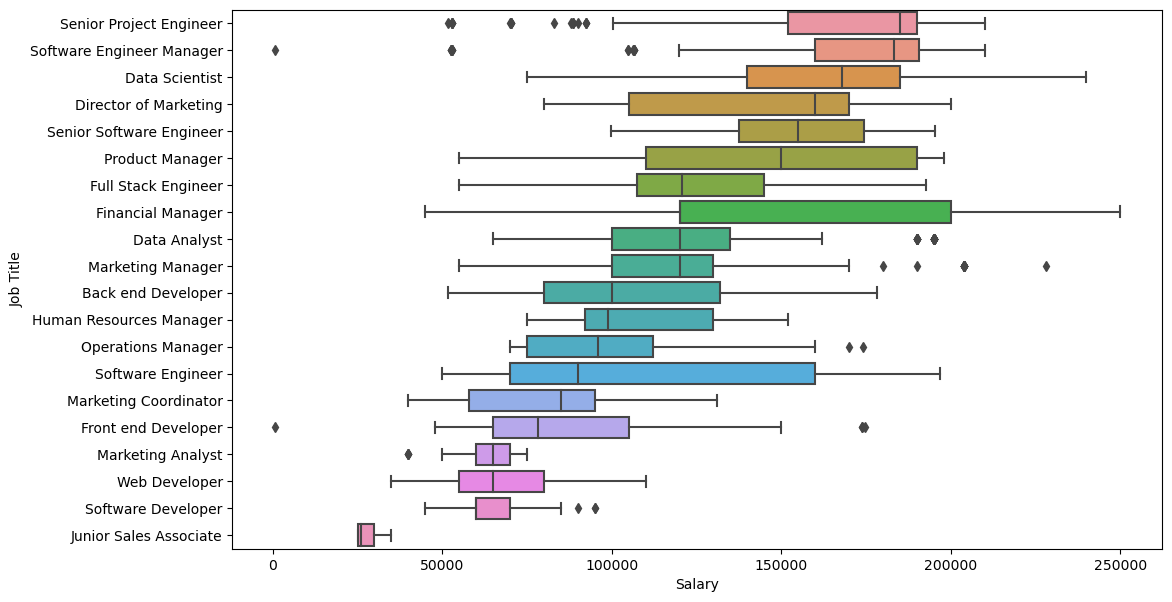

In [19]:
num_pop_jobs = 20
pop_jobs = salary_data['Job Title'].value_counts()[:num_pop_jobs].index
pop_jobs_data = salary_data[salary_data['Job Title'].isin(pop_jobs)]

plt.figure(figsize=(12,7))
sns.boxplot(y='Job Title', x='Salary', data=pop_jobs_data,
            order=pop_jobs_data.groupby('Job Title')['Salary']
            .median().sort_values(ascending=False).index)

In [5]:
fig,  axes - plt.subplots(hrows = 1, ncols = 3, figsize=(12, 4 ))

g = sns.violinplot(x="Gender", y = "Salary", data=salary_data, ax = axes[0])
g.set(title="З/п от пола",xlabel = None)

g = sns.violinplot(x="Education Level", y = "Salary",hue = "Gender", data=salary_data, ax = axes[1])
g.set(title="З/п от пола и уровня образования ",xlabel = None)

g = sns.contplot(x="Gender", hue = "Education Level", data=salary_data, ax = axes[0])
g.set(title="Участники по уровню Образования",xlabel = None)
plt.tight_layout()


NameError: name 'fig' is not defined